# Mobikwik

In [3]:
import glob
import pandas as pd
import gensim
import spacy
import numpy as np
import tqdm.notebook as tqdm
from pprint import pprint

import sys
sys.path.append('/Users/pushkar/Documents/projects/fin_comp/comp/docs')
from utils.helper import preprocess_tweet, sentence_to_words, lemmatization

In [62]:
df = pd.read_csv('./../../data/fintech/mobikwik/mobikwik.csv')

In [63]:
df.shape

(53210, 27)

In [64]:
pre_df = df[df['date'] < '2020-02-01']
post_df = df[df['date'] >= '2020-02-01']

## Preprocessing

In [65]:
# Preprocess tweets
pre_df['preprocessed'] = pre_df['tweet'].apply(preprocess_tweet)
post_df['preprocessed'] = post_df['tweet'].apply(preprocess_tweet)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/1398106268.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['preprocessed'] = pre_df['tweet'].apply(preprocess_tweet)
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/1398106268.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['preprocessed'] = post_df['tweet'].apply(preprocess_tweet)


In [66]:
# Create words data
pre_data = pre_df['preprocessed'].values.tolist()
# fintech_data_words = list(sentence_to_words(fintech_data))
pre_data_words = list(sentence_to_words(pre_data))

# Create words data
post_data = post_df['preprocessed'].values.tolist()
# fintech_data_words = list(sentence_to_words(fintech_data))
post_data_words = list(sentence_to_words(post_data))

In [67]:
# For pre-covid period
# Build bigram and trigram models
pre_bigram = gensim.models.phrases.Phrases(pre_data_words, min_count=5, threshold=10, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
pre_trigram = gensim.models.phrases.Phrases(pre_bigram[pre_data_words], threshold=100)

pre_bigram_model = gensim.models.phrases.Phraser(pre_bigram)
pre_trigram_model = gensim.models.phrases.Phraser(pre_trigram)

# For post-covid period
# Build bigram and trigram models
post_bigram = gensim.models.phrases.Phrases(post_data_words, min_count=5, threshold=10, connector_words=gensim.models.phrases.ENGLISH_CONNECTOR_WORDS)
post_trigram = gensim.models.phrases.Phrases(post_bigram[post_data_words], threshold=100)

post_bigram_model = gensim.models.phrases.Phraser(post_bigram)
post_trigram_model = gensim.models.phrases.Phraser(post_trigram)

In [68]:
# Remove stopwords
pre_df['preprocessed'] = pre_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)
post_df['preprocessed'] = post_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/4258172292.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['preprocessed'] = pre_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/4258172292.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['preprocessed'] = post_df['preprocessed'].apply(gensim.parsing.preprocessing.remove_stopwords)


In [69]:
pre_df['sep_words'] = pre_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])
post_df['sep_words'] = post_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/3599064045.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['sep_words'] = pre_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/3599064045.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['sep_words'] = post_df['preprocessed'].apply(lambda x: list(sentence_to_words([x]))[0])


In [70]:
pre_df['bigram'] = pre_df['sep_words'].apply(lambda x: pre_bigram_model[x])
post_df['bigram'] = post_df['sep_words'].apply(lambda x: post_bigram_model[x])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/1623641631.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['bigram'] = pre_df['sep_words'].apply(lambda x: pre_bigram_model[x])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/1623641631.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['bigram'] = post_df['sep_words'].apply(lambda x: post_bigram_model[x])


In [71]:
pre_df['trigram'] = pre_df['bigram'].apply(lambda x: [pre_trigram_model[x]])
post_df['trigram'] = post_df['bigram'].apply(lambda x: [post_trigram_model[x]])

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/1589984664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pre_df['trigram'] = pre_df['bigram'].apply(lambda x: [pre_trigram_model[x]])
/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/1589984664.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  post_df['trigram'] = post_df['bigram'].apply(lambda x: [post_trigram_model[x]])


In [72]:
pre_id2word = gensim.corpora.Dictionary(pre_df['bigram'].values.tolist())
post_id2word = gensim.corpora.Dictionary(post_df['bigram'].values.tolist())

In [73]:
pre_corpus = [pre_id2word.doc2bow(text) for text in pre_df['bigram'].values.tolist()]
post_corpus = [post_id2word.doc2bow(text) for text in post_df['bigram'].values.tolist()]

## Base Model

### Training

In [18]:
pre_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [19]:
pprint(pre_lda_model.print_topics())
pre_doc_lda = pre_lda_model[pre_corpus]

[(0,
  '0.029*"mobikwik" + 0.027*"fraud" + 0.023*"issue" + 0.013*"response" + '
  '0.013*"guys" + 0.013*"team" + 0.013*"customer_care" + 0.010*"days" + '
  '0.010*"resolve" + 0.010*"support"'),
 (1,
  '0.041*"mobikwik" + 0.018*"dm" + 0.013*"help" + 0.012*"money" + '
  '0.012*"share" + 0.011*"thanks" + 0.011*"hi" + 0.010*"reply" + 0.009*"hello" '
  '+ 0.009*"ur"'),
 (2,
  '0.021*"mobikwik" + 0.021*"hai" + 0.019*"se" + 0.013*"ka" + 0.011*"sir" + '
  '0.010*"ki" + 0.009*"ke" + 0.009*"nhi" + 0.008*"mera" + 0.008*"ko"'),
 (3,
  '0.108*"mobikwik" + 0.069*"supercash" + 0.063*"rs" + 0.049*"use" + '
  '0.043*"cashback" + 0.038*"offer" + 0.034*"wallet" + 0.019*"sign" + '
  '0.018*"referral_code" + 0.014*"upi"'),
 (4,
  '0.066*"mobikwik" + 0.029*"payment" + 0.023*"account" + 0.018*"app" + '
  '0.016*"paytm" + 0.010*"kyc" + 0.010*"mobile" + 0.010*"able" + 0.010*"pay" + '
  '0.009*"option"'),
 (5,
  '0.035*"mobikwik" + 0.019*"insurance_today" + 0.018*"millennial_burger" + '
  '0.018*"cleartax_matur

In [20]:
post_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=10,
                                        random_state=42,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True)

In [21]:
pprint(post_lda_model.print_topics())
post_doc_lda = post_lda_model[post_corpus]

[(0,
  '0.035*"mobikwik" + 0.019*"help" + 0.015*"payment" + 0.014*"apna" + '
  '0.013*"paid" + 0.012*"want" + 0.011*"check" + 0.011*"updated" + '
  '0.009*"ticket_id" + 0.009*"received"'),
 (1,
  '0.031*"hai" + 0.024*"switch" + 0.021*"mobikwik" + 0.021*"se" + 0.015*"ka" + '
  '0.014*"start" + 0.013*"apps" + 0.013*"bhi" + 0.012*"products" + 0.012*"ki"'),
 (2,
  '0.030*"mobikwik" + 0.018*"emi" + 0.015*"loan" + 0.008*"moratorium" + '
  '0.008*"sir" + 0.008*"customer" + 0.008*"change" + 0.007*"kya" + '
  '0.007*"company" + 0.007*"buy"'),
 (3,
  '0.055*"mobikwik" + 0.015*"share" + 0.014*"thanks" + 0.013*"hi" + '
  '0.012*"users" + 0.010*"details" + 0.009*"concern" + 0.009*"request" + '
  '0.008*"dm" + 0.008*"freecharge"'),
 (4,
  '0.054*"mobikwik" + 0.031*"right" + 0.023*"assist" + 0.019*"response" + '
  '0.018*"payment" + 0.018*"didnt_receive" + 0.015*"wallet" + 0.015*"till" + '
  '0.015*"assistance_required" + 0.014*"link"'),
 (5,
  '0.047*"mobikwik" + 0.038*"recharge" + 0.028*"app" + 0.0

### Evaluation

In [22]:
pre_coherence_model_lda = gensim.models.CoherenceModel(model=pre_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_coherence_lda = pre_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_coherence_lda)

Pre-COVID Coherence Score:  -7.012563066749388


In [23]:
post_coherence_model_lda = gensim.models.CoherenceModel(model=post_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_coherence_lda = post_coherence_model_lda.get_coherence()
print('Post-COVID Coherence Score: ', post_coherence_lda)

Post-COVID Coherence Score:  -5.4178150781011585


## Hyper-parameter tuning

In [24]:
def compute_coherence_values(corpus, dictionary, k, alpha, beta, texts, coherence='u_mass'):
    
    lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                           id2word=dictionary,
                                           num_topics=k, 
                                           random_state=100,
                                           chunksize=100,
                                           passes=10,
                                           alpha=alpha,
                                           eta=beta)
    
    coherence_model_lda = gensim.models.CoherenceModel(model=lda_model, 
                                                        texts=texts, 
                                                        dictionary=dictionary, 
                                                        coherence=coherence)
    
    return coherence_model_lda.get_coherence()

### Pre-COVID

In [25]:
grid = {}
grid['Validation_Set'] = {}

In [26]:
corpus = pre_corpus

In [27]:
# Topics range
min_topics = 2
max_topics = 31
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [28]:
iterations = len(topics_range) * len(alpha) * len(beta) * len(corpus_sets)

In [29]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=iterations)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], 
                                                  dictionary=pre_id2word, 
                                                  k=k, alpha=a, beta=b,
                                                  texts=pre_df['bigram'].values.tolist(),
                                                  coherence='u_mass')
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    pre_df_result = pd.DataFrame(model_results)
    pbar.close()

  0%|          | 0/1740 [00:00<?, ?it/s]

In [30]:
pre_df_result

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,-3.567331
1,75% Corpus,2,0.01,0.31,-3.878069
2,75% Corpus,2,0.01,0.61,-3.967180
3,75% Corpus,2,0.01,0.91,-3.976411
4,75% Corpus,2,0.01,symmetric,-3.968118
...,...,...,...,...,...
1735,100% Corpus,30,asymmetric,0.01,-9.355907
1736,100% Corpus,30,asymmetric,0.31,-13.727063
1737,100% Corpus,30,asymmetric,0.61,-12.700660
1738,100% Corpus,30,asymmetric,0.91,-12.243464


In [ ]:
pre_df_result['Alpha'] = pre_df_result['Alpha'].astype(str)
pre_df_result['Beta'] = pre_df_result['Beta'].astype(str)

In [51]:
# pre_df_result.to_csv("./../../data/fintech/mobikwik/pre.csv")

In [21]:
pre_df_result = pd.read_csv("./../../data/fintech/mobikwik/pre.csv")
pre_df_result.drop('Unnamed: 0', axis=1, inplace=True)

In [22]:
# Maximum coherence
pre_df_result.sort_values('Coherence', ascending=False, inplace=True)
# pre_df_result[pre_df_result['Coherence'] == pre_df_result['Coherence'].max()]
pre_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
827,75% Corpus,29,0.9099999999999999,0.61,-3.038479
857,75% Corpus,30,0.9099999999999999,0.61,-3.134583
828,75% Corpus,29,0.9099999999999999,0.9099999999999999,-3.154728
858,75% Corpus,30,0.9099999999999999,0.9099999999999999,-3.170884
1727,100% Corpus,30,0.9099999999999999,0.61,-3.207200
797,75% Corpus,28,0.9099999999999999,0.61,-3.207372
25,75% Corpus,2,asymmetric,0.01,-3.314294
708,75% Corpus,25,0.9099999999999999,0.9099999999999999,-3.316380
1698,100% Corpus,29,0.9099999999999999,0.9099999999999999,-3.439472
873,100% Corpus,2,0.01,0.9099999999999999,-3.465457


In [34]:
pre_topics_score = []
for i in pre_df_result['Topics'].value_counts().index:
    data = []
    data.append(i)
    temp = pre_df_result[(pre_df_result['Topics'] == i) & (pre_df_result['Alpha'] == '0.01') & (pre_df_result['Beta'] == pre_df_result['Beta'].unique()[1])]
    max_value = temp['Coherence'].max()
    data.append(max_value)
    pre_topics_score.append(data)

In [35]:
pre_ts_df = pd.DataFrame(pre_topics_score)
pre_ts_df.columns = ['topics', 'coherence']

In [36]:
pre_ts_df.sort_values('topics', inplace=True)
pre_ts_df.head()

,topics,coherence
26,2,-3.465457
24,3,-7.033945
23,4,-8.230486
22,5,-8.218384
20,6,-9.743104


<AxesSubplot: xlabel='topics'>

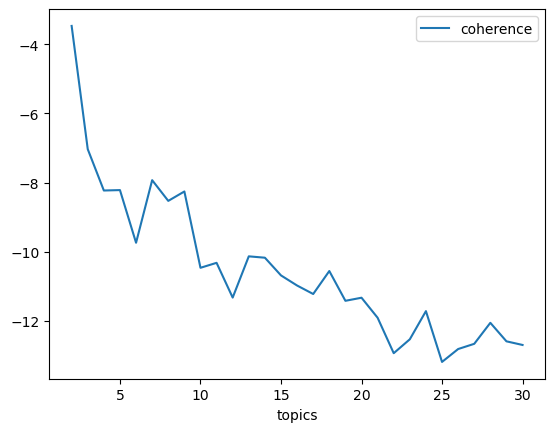

In [37]:
pre_ts_df.plot.line(x='topics', y='coherence')

In [38]:
pre_df_result[pre_df_result['Topics'] == 2].head()

,Validation_Set,Topics,Alpha,Beta,Coherence
25,75% Corpus,2,asymmetric,0.01,-3.314294
873,100% Corpus,2,0.01,0.9099999999999999,-3.465457
15,75% Corpus,2,0.9099999999999999,0.01,-3.555242
0,75% Corpus,2,0.01,0.01,-3.567331
875,100% Corpus,2,0.31,0.01,-3.593704


### Post-COVID

In [39]:
grid = {}
grid['Validation_Set'] = {}

In [37]:
corpus = post_corpus

In [38]:
# Topics range
min_topics = 2
max_topics = 31
step_size = 1
topics_range = range(min_topics, max_topics, step_size)

# Alpha parameter
alpha = list(np.arange(0.01, 1, 0.3))
alpha.append('symmetric')
alpha.append('asymmetric')

# Beta parameter
beta = list(np.arange(0.01, 1, 0.3))
beta.append('symmetric')

# Validation sets
num_of_docs = len(corpus)
corpus_sets = [gensim.utils.ClippedCorpus(corpus, int(num_of_docs*0.75)), 
               corpus]
corpus_title = ['75% Corpus', '100% Corpus']
model_results = {'Validation_Set': [],
                 'Topics': [],
                 'Alpha': [],
                 'Beta': [],
                 'Coherence': []
                }

In [39]:
iterations = len(topics_range) * len(alpha) * len(beta) * len(corpus_sets)

In [40]:
# Can take a long time to run
if 1 == 1:
    pbar = tqdm.tqdm(total=iterations)
    
    # iterate through validation corpuses
    for i in range(len(corpus_sets)):
        # iterate through number of topics
        for k in topics_range:
            # iterate through alpha values
            for a in alpha:
                # iterare through beta values
                for b in beta:
                    # get the coherence score for the given parameters
                    cv = compute_coherence_values(corpus=corpus_sets[i], 
                                                  dictionary=post_id2word, 
                                                  k=k, alpha=a, beta=b,
                                                  texts=post_df['bigram'].values.tolist(),
                                                  coherence='u_mass')
                    # Save the model results
                    model_results['Validation_Set'].append(corpus_title[i])
                    model_results['Topics'].append(k)
                    model_results['Alpha'].append(a)
                    model_results['Beta'].append(b)
                    model_results['Coherence'].append(cv)
                    
                    pbar.update(1)
    post_df_result = pd.DataFrame(model_results)
    pbar.close()

  0%|          | 0/1740 [00:00<?, ?it/s]

In [41]:
post_df_result.head()

,Validation_Set,Topics,Alpha,Beta,Coherence
0,75% Corpus,2,0.01,0.01,-3.379641
1,75% Corpus,2,0.01,0.31,-3.651609
2,75% Corpus,2,0.01,0.61,-3.615748
3,75% Corpus,2,0.01,0.91,-3.513560
4,75% Corpus,2,0.01,symmetric,-3.658355


In [ ]:
post_df_result['Alpha'] = post_df_result['Alpha'].astype(str)
post_df_result['Beta'] = post_df_result['Beta'].astype(str)

In [52]:
# post_df_result.to_csv("./../../data/fintech/mobikwik/post.csv")

In [40]:
post_df_result = pd.read_csv("./../../data/fintech/mobikwik/post.csv")
post_df_result.drop('Unnamed: 0', axis=1, inplace=True)

In [41]:
# Maximum coherence
post_df_result.sort_values('Coherence', ascending=False, inplace=True)
# pre_df_result[pre_df_result['Coherence'] == pre_df_result['Coherence'].max()]
post_df_result.head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
86,75% Corpus,4,asymmetric,0.31,-3.075333
28,75% Corpus,2,asymmetric,0.9099999999999999,-3.126290
89,75% Corpus,4,asymmetric,symmetric,-3.160615
131,75% Corpus,6,0.61,0.31,-3.173162
58,75% Corpus,3,asymmetric,0.9099999999999999,-3.211476
108,75% Corpus,5,0.9099999999999999,0.9099999999999999,-3.221271
106,75% Corpus,5,0.9099999999999999,0.31,-3.257835
958,100% Corpus,4,asymmetric,0.9099999999999999,-3.258249
164,75% Corpus,7,0.61,symmetric,-3.272086
1698,100% Corpus,29,0.9099999999999999,0.9099999999999999,-3.301746


In [55]:
post_topics_score = []
for i in post_df_result['Topics'].value_counts().index:
    data = []
    data.append(i)
    temp = post_df_result[(post_df_result['Topics'] == i) & (post_df_result['Alpha'] == 'asymmetric') & (post_df_result['Beta'] == '0.9099999999999999') & (post_df_result['Validation_Set'] == '100% Corpus')]
    max_value = temp['Coherence'].max()
    data.append(max_value)
    post_topics_score.append(data)

In [56]:
post_ts_df = pd.DataFrame(post_topics_score)
post_ts_df.columns = ['topics', 'coherence']

In [57]:
post_ts_df.sort_values('topics', inplace=True)
post_ts_df.head()

,topics,coherence
15,2,-3.352523
26,3,-3.918687
0,4,-3.258249
25,5,-3.735640
27,6,-5.632998


<AxesSubplot: xlabel='topics'>

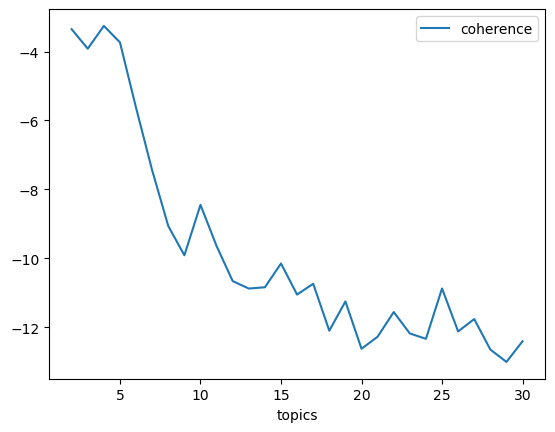

In [58]:
post_ts_df.plot.line(x='topics', y='coherence')

In [60]:
post_df_result[(post_df_result['Topics'] == 4)].head(10)

,Validation_Set,Topics,Alpha,Beta,Coherence
86,75% Corpus,4,asymmetric,0.31,-3.075333
89,75% Corpus,4,asymmetric,symmetric,-3.160615
958,100% Corpus,4,asymmetric,0.9099999999999999,-3.258249
84,75% Corpus,4,symmetric,symmetric,-3.306665
64,75% Corpus,4,0.01,symmetric,-3.343814
61,75% Corpus,4,0.01,0.31,-3.370685
63,75% Corpus,4,0.01,0.9099999999999999,-3.423411
74,75% Corpus,4,0.61,symmetric,-3.443292
62,75% Corpus,4,0.01,0.61,-3.446628
953,100% Corpus,4,symmetric,0.9099999999999999,-3.474333


## Final Models

In [74]:
pre_final_lda_model = gensim.models.LdaMulticore(corpus=pre_corpus,
                                        id2word=pre_id2word,
                                        num_topics=2,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha= 0.01,
                                        eta=0.91)

In [75]:
pre_final_coherence_model_lda = gensim.models.CoherenceModel(model=pre_final_lda_model, 
                                                    texts=pre_df['bigram'].values.tolist(), 
                                                    dictionary=pre_id2word, 
                                                    coherence='u_mass')
pre_final_coherence_lda = pre_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', pre_final_coherence_lda)

Pre-COVID Coherence Score:  -4.088332528058382


In [89]:
post_final_lda_model = gensim.models.LdaMulticore(corpus=post_corpus,
                                        id2word=post_id2word,
                                        num_topics=4,
                                        random_state=100,
                                        chunksize=100,
                                        passes=10,
                                        per_word_topics=True,
                                        alpha='asymmetric',
                                        eta=0.91)

In [90]:
post_final_coherence_model_lda = gensim.models.CoherenceModel(model=post_final_lda_model, 
                                                    texts=post_df['bigram'].values.tolist(), 
                                                    dictionary=post_id2word, 
                                                    coherence='u_mass')
post_final_coherence_lda = post_final_coherence_model_lda.get_coherence()
print('Pre-COVID Coherence Score: ', post_final_coherence_lda)

Pre-COVID Coherence Score:  -3.2625972051703918


## Inferencing

In [80]:
def dominant_topics(ldamodel, corpus, texts):
    sent_topics_df = pd.DataFrame()
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row[0], key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j==0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(
                    pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True
                )
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    sent_topics_df.rename(columns={0: "Text"}, inplace=True)
    return sent_topics_df

In [81]:
pre_df_topic_sents_keywords = dominant_topics(
   ldamodel=pre_final_lda_model, corpus=pre_corpus, texts=pre_df['bigram'].values.tolist()
)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/4013737119.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(


In [85]:
pre_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,1,0.9992,"mobikwik, money, wallet, account, app, payment...","[piss, drinking, human, crap, eating, fucking,..."
1,0,0.9988,"mobikwik, supercash, rs, use, cashback, wallet...","[irctc_uts, app, offer, use, mobikwik, superca..."
2,1,0.9990,"mobikwik, money, wallet, account, app, payment...","[dont, care, customers, misbehaving, customers..."
3,1,0.9990,"mobikwik, money, wallet, account, app, payment...","[dont, care, customers, misbehaving, customers..."
4,1,0.9994,"mobikwik, money, wallet, account, app, payment...","[stay_away, recharged, jio, phonepe, debited, ..."
...,...,...,...,...
19726,0,0.9990,"mobikwik, supercash, rs, use, cashback, wallet...","[sign, mobikwik, use, referral_code, rse, bz, ..."
19727,1,0.9902,"mobikwik, money, wallet, account, app, payment...",[money]
19728,1,0.9987,"mobikwik, money, wallet, account, app, payment...","[understand, big, money, meand, team, daysretu..."
19729,1,0.9990,"mobikwik, money, wallet, account, app, payment...","[seriously, raised, issue, confidently, giving..."


In [86]:
pre_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['mobikwik, money, wallet, account, app, payment, help, refund, number, transaction',
       'mobikwik, supercash, rs, use, cashback, wallet, offer, sign, referral_code, app'],
      dtype=object)

In [91]:
post_df_topic_sents_keywords = dominant_topics(
   ldamodel=post_final_lda_model, corpus=post_corpus, texts=post_df['bigram'].values.tolist()
)

/var/folders/zl/bqtzmz3s0xl5_ddgbjsqxsww0000gn/T/ipykernel_86453/4013737119.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  sent_topics_df = sent_topics_df.append(


In [92]:
post_df_topic_sents_keywords

,Dominant_Topic,Perc_Contribution,Topic_Keywords,Text
0,0,0.8975,"mobikwik, wallet, payment, money, account, rs,...","[dmed, query, kindly_resolve, priority, basis]"
1,0,0.9615,"mobikwik, wallet, payment, money, account, rs,...","[sir, ive, mobikwk, debit_card, try, set, upi,..."
2,3,0.9525,"hai, mobikwik, se, ka, bhi, ki, ko, nahi, ye, aur","[mobikwik, chor_hai, yah, company, company, se..."
3,2,0.4227,"app, mobikwik, indian, use, support, switch, d...","[bahut, company, use, application]"
4,3,0.6236,"hai, mobikwik, se, ka, bhi, ki, ko, nahi, ye, aur","[company, hai, mere, refund, nahi, diya, months]"
...,...,...,...,...
33474,0,0.8973,"mobikwik, wallet, payment, money, account, rs,...","[gyftr, supercash_upto, rs, mobikwik, visit]"
33475,0,0.8777,"mobikwik, wallet, payment, money, account, rs,...","[recharge, update, vodafone, account]"
33476,0,0.9442,"mobikwik, wallet, payment, money, account, rs,...","[dear_team, plz_help, able, login, ac, pl_help..."
33477,0,0.9233,"mobikwik, wallet, payment, money, account, rs,...","[dear_team, help, able, login, ac, bit, urgent]"


In [93]:
post_df_topic_sents_keywords['Topic_Keywords'].unique()

array(['mobikwik, wallet, payment, money, account, rs, recharge, app, refund, transaction',
       'hai, mobikwik, se, ka, bhi, ki, ko, nahi, ye, aur',
       'app, mobikwik, indian, use, support, switch, download, superlife, payment, payments',
       'mobikwik, truly_indian, payments_app, thanks, continue, reach, dm, thank, hi, case'],
      dtype=object)

In [94]:
pre_df_topic_sents_keywords['Dominant_Topic'].value_counts()

1    12956
0     6775
Name: Dominant_Topic, dtype: int64

In [95]:
post_df_topic_sents_keywords['Dominant_Topic'].value_counts()

0    18804
2     8760
1     3217
3     2698
Name: Dominant_Topic, dtype: int64